In [1]:
# Importing Packages.
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
# function for title
def show_title(title):
        for i in range(1,50):
            if(i==25):
                print("| ",title," |",end="")
            else:
                print(":",end="")
        print("")

In [3]:
# Reading the Data from Database records.csv
file="records.csv"
df = pd.read_csv(file)
# View  the dataset
show_title("SHAPE OF RECORDS")
print("\n\t\t\t(Rows,columns) = ",df.shape)

::::::::::::::::::::::::|  SHAPE OF RECORDS  |::::::::::::::::::::::::

			(Rows,columns) =  (21464, 6)


In [4]:
show_title("First Five Rows Of records")
df.head()

::::::::::::::::::::::::|  First Five Rows Of records  |::::::::::::::::::::::::


,Station_number,Observation_time,Showalter_index,Lifted_index,SWEAT_index,Precipitable_water_mm_for_entire_sounding
0,42647,180320/1200,5.24,6.19,104.40,17.86
1,42647,180321/0000,5.79,8.43,105.21,16.44
2,42647,180321/1200,0.75,1.49,154.21,21.42
3,42647,180322/0000,3.26,5.82,155.39,17.1
4,42647,170901/0000,6.02,3.61,259.81,56.65


In [5]:
show_title("Data Information")
df.info()

::::::::::::::::::::::::|  Data Information  |::::::::::::::::::::::::
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21464 entries, 0 to 21463
Data columns (total 6 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Station_number                             21464 non-null  int64  
 1   Observation_time                           21464 non-null  object 
 2   Showalter_index                            18940 non-null  float64
 3   Lifted_index                               20827 non-null  float64
 4   SWEAT_index                                13957 non-null  float64
 5   Precipitable_water_mm_for_entire_sounding  21388 non-null  object 
dtypes: float64(3), int64(1), object(2)
memory usage: 1006.2+ KB


In [6]:
show_title("Datatypes")
df.dtypes

::::::::::::::::::::::::|  Datatypes  |::::::::::::::::::::::::


Station_number                                 int64
Observation_time                              object
Showalter_index                              float64
Lifted_index                                 float64
SWEAT_index                                  float64
Precipitable_water_mm_for_entire_sounding     object
dtype: object

In [7]:
column_names={'Precipitable_water_mm_for_entire_sounding':'precipitable','Station_number':'stn_no','Observation_time':'obsrve','Showalter_index':'showalter','Lifted_index':'lifted','SWEAT_index':'sweat'}
df=df.rename(columns=column_names)
show_title("Column names after Rename")
for i in df:
    print(i)

::::::::::::::::::::::::|  Column names after Rename  |::::::::::::::::::::::::
stn_no
obsrve
showalter
lifted
sweat
precipitable


In [8]:
df['precipitable']=pd.to_numeric(df['precipitable'],errors='coerce')
show_title("After Type Casting")
df.dtypes

::::::::::::::::::::::::|  After Type Casting  |::::::::::::::::::::::::


stn_no            int64
obsrve           object
showalter       float64
lifted          float64
sweat           float64
precipitable    float64
dtype: object

In [9]:
show_title("Empty Column Records")
print("\n\tTrue indicate column contains Empty cell\n\n\tFalse indicate no empty cell")
df.isnull().any()

::::::::::::::::::::::::|  Empty Column Records  |::::::::::::::::::::::::

	True indicate column contains Empty cell

	False indicate no empty cell


stn_no          False
obsrve          False
showalter        True
lifted           True
sweat            True
precipitable     True
dtype: bool

In [10]:
show_title("Column wise Empty Cell")
df.isnull().sum()

::::::::::::::::::::::::|  Column wise Empty Cell  |::::::::::::::::::::::::


stn_no             0
obsrve             0
showalter       2524
lifted           637
sweat           7507
precipitable      77
dtype: int64

In [11]:
# shows discription of data (mean median IQR min value max value )
show_title("Discription of data")
df.describe()

::::::::::::::::::::::::|  Discription of data  |::::::::::::::::::::::::


,stn_no,showalter,lifted,sweat,precipitable
count,21464.0,18940.000000,20827.000000,13957.000000,21387.000000
mean,42647.0,4.330506,2.853156,165.709708,39.744277
std,0.0,8.097862,9.189146,165.832427,223.135088
min,42647.0,-88.930000,-93.120000,0.520000,-2443.830000
25%,42647.0,-0.300000,-2.725000,68.580000,14.640000
50%,42647.0,3.720000,1.450000,141.400000,25.790000
75%,42647.0,8.640000,7.680000,233.400000,46.340000
max,42647.0,111.010000,157.160000,3928.860000,6293.000000


In [13]:
show_title("Data wrangling")
print("\n\tUsing numpy NaN (Not a Number)")

::::::::::::::::::::::::|  Data wrangling  |::::::::::::::::::::::::

	Using numpy NaN (Not a Number)


In [14]:
cdf=df[["stn_no","showalter","lifted","sweat","precipitable"]]
actual_data=cdf[["showalter","lifted","sweat","precipitable"]]
actual_data.replace('',np.nan)

,showalter,lifted,sweat,precipitable
0,5.24,6.19,104.40,17.86
1,5.79,8.43,105.21,16.44
2,0.75,1.49,154.21,21.42
3,3.26,5.82,155.39,17.10
4,6.02,3.61,259.81,56.65
...,...,...,...,...
21459,NaN,NaN,NaN,9.68
21460,10.64,7.26,22.01,13.82
21461,5.94,-2.08,42.98,23.55
21462,4.03,6.27,39.98,16.54


In [15]:
df=actual_data.iloc[1:,]

In [16]:
df.head()

,showalter,lifted,sweat,precipitable
1,5.79,8.43,105.21,16.44
2,0.75,1.49,154.21,21.42
3,3.26,5.82,155.39,17.10
4,6.02,3.61,259.81,56.65
5,4.35,0.94,242.59,64.68


In [17]:
missing_data=df.isnull()
for column in missing_data.columns.values.tolist():
        print(column)
        print(missing_data[column].value_counts())
        print("")


showalter
False    18939
True      2524
Name: showalter, dtype: int64

lifted
False    20826
True       637
Name: lifted, dtype: int64

sweat
False    13956
True      7507
Name: sweat, dtype: int64

precipitable
False    21386
True        77
Name: precipitable, dtype: int64



In [18]:
show_title("Calculate mean's")
avrg_Showalter_index=df["showalter"].astype("float").mean(axis=0)
print("Shoalter_index = ",avrg_Showalter_index)


avrg_Lifted_index=df["lifted"].astype("float").mean(axis=0)
print("Lifted_index = ",avrg_Lifted_index)

avrg_SWEAT_index=df["sweat"].astype("float").mean(axis=0)
print("SWEAT_index = ",avrg_SWEAT_index)

avrg_P_index=df["precipitable"].astype("float").mean(axis=0)
print("Precipitable_index = ",avrg_P_index)

::::::::::::::::::::::::|  Calculate mean's  |::::::::::::::::::::::::
Shoalter_index =  4.330458313532933
Lifted_index =  2.852996254681655
SWEAT_index =  165.71410146173545
Precipitable_index =  39.745300663985695


In [19]:
#Replace NaN with mean of respective column
df['showalter'].replace(np.nan,avrg_Showalter_index,inplace=True)
df['lifted'].replace(np.nan,avrg_Lifted_index,inplace=True)
df['sweat'].replace(np.nan,avrg_SWEAT_index,inplace=True)
df['precipitable'].replace(np.nan,avrg_P_index,inplace=True)

In [20]:
verify_data=df.isnull()
for column in verify_data.columns.values.tolist():
    print(column)
    print(verify_data[column].value_counts())
    print("")

showalter
False    21463
Name: showalter, dtype: int64

lifted
False    21463
Name: lifted, dtype: int64

sweat
False    21463
Name: sweat, dtype: int64

precipitable
False    21463
Name: precipitable, dtype: int64



In [21]:
show_title("Corelation")
df[['showalter','lifted','sweat','precipitable']].corr()

::::::::::::::::::::::::|  Corelation  |::::::::::::::::::::::::


,showalter,lifted,sweat,precipitable
showalter,1.000000,0.581046,-0.622340,-0.035891
lifted,0.581046,1.000000,-0.447339,-0.047485
sweat,-0.622340,-0.447339,1.000000,0.022388
precipitable,-0.035891,-0.047485,0.022388,1.000000


::::::::::::::::::::::::|  Scatter for showalter,pricipitable  |::::::::::::::::::::::::


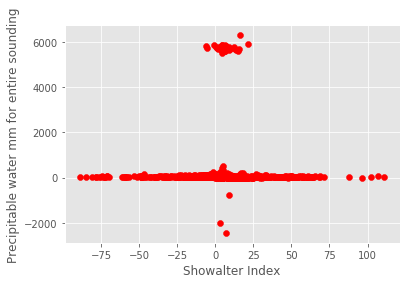

::::::::::::::::::::::::|  Scatter for showalter,lifted  |::::::::::::::::::::::::


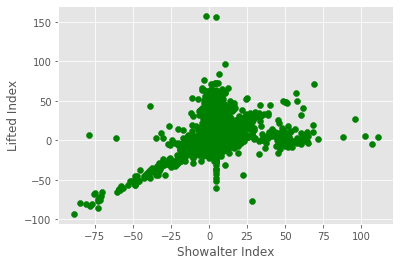

::::::::::::::::::::::::|  Scatter for showalter,sweat  |::::::::::::::::::::::::


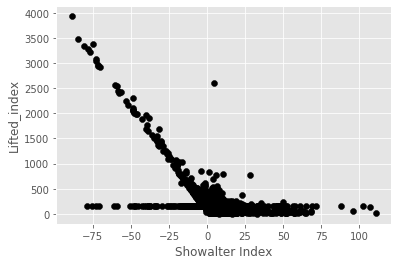

In [22]:
show_title("Scatter for showalter,pricipitable")
plt.style.use('ggplot')
plt.scatter(df.showalter,df.precipitable,color='red')
plt.xlabel("Showalter Index")
plt.ylabel("Precipitable water mm for entire sounding")
plt.show()
show_title("Scatter for showalter,lifted")
plt.scatter(df.showalter,df.lifted,color='green')
plt.ylabel("Lifted Index")
plt.xlabel("Showalter Index")
plt.show()
show_title("Scatter for showalter,sweat")
plt.scatter(df.showalter,df.sweat,color='black')
plt.ylabel("Lifted_index")
plt.xlabel("Showalter Index")
plt.show()

::::::::::::::::::::::::|  Scatter for lifted , sweat  |::::::::::::::::::::::::


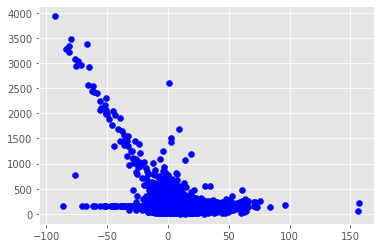

In [23]:
show_title("Scatter for lifted , sweat")
plt.scatter(df.lifted,df.sweat,color='blue')
plt.show()

::::::::::::::::::::::::|  histogram for all columns  |::::::::::::::::::::::::


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000192E82D7048>,
      dtype=object)

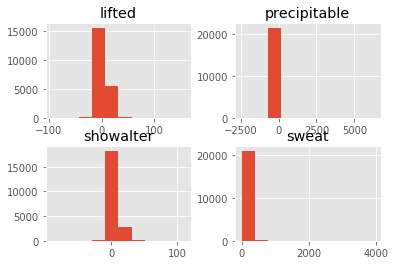

In [24]:
show_title("histogram for all columns")
viz=df[['showalter','lifted','sweat','precipitable']]
viz.hist()


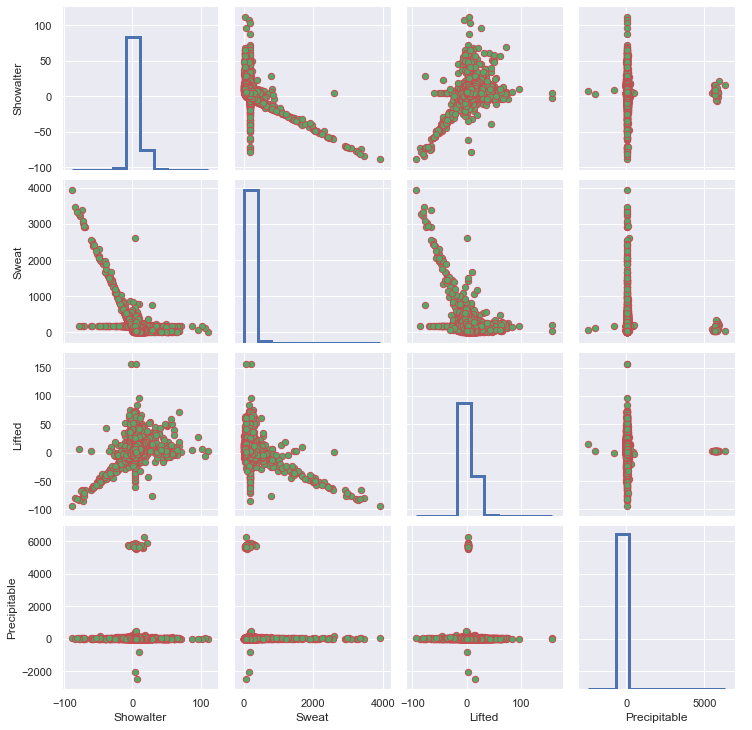

In [25]:
#for graphs
import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
sns.set(rc={'figure.figsize':(25,15)})
x = df['showalter'].dropna()
y = df['sweat'].dropna()
t = df['lifted'].dropna()
prcd = df['precipitable']
dataSet = pd.DataFrame(list(zip(x, y, t, prcd)),columns=['Showalter', 'Sweat', 'Lifted', 'Precipitable'])

p = sns.PairGrid(dataSet,hue=None,palette="Set1",hue_kws={"marker":["o","D"]})
p = p.map_diag(plt.hist,histtype="step",linewidth=3)
p = p.map_offdiag(plt.scatter,edgecolor='r',s=40,color='g')
p = p.add_legend()

In [26]:
msk=np.random.rand(len(df)) < 0.8

In [27]:
train=df[msk]

In [28]:
test=df[~msk]

In [30]:
show_title("Division of data set")
print("\t\t+--------------+---------------+")
print('\t\t| test set     |   ',test.shape," |")
print('\t\t| train set    | + ',train.shape,"|")
print("\t\t+--------------+---------------+")
print('\t\t| Original set |  ',df.shape," |")
print("\t\t+--------------+---------------+")

::::::::::::::::::::::::|  Division of data set  |::::::::::::::::::::::::
		+--------------+---------------+
		| test set     |    (4249, 4)  |
		| train set    | +  (17214, 4) |
		+--------------+---------------+
		| Original set |   (21463, 4)  |
		+--------------+---------------+


In [31]:
test.head()

,showalter,lifted,sweat,precipitable
10,1.51,-1.00,211.00,46.00
17,-1.52,-3.64,221.80,67.94
19,0.01,-1.86,242.99,66.93
22,2.95,-3.13,153.78,43.88
32,1.38,-0.14,235.19,54.78


In [32]:
Xtrain=train[['showalter']]
Ytrain=train[['lifted']]

In [33]:
Xtest=test[['showalter']]
Ytest=test[['lifted']]

In [34]:
show_title("records in train and test")
print("total records in Xtrain :: ",Xtrain.shape)
print("total records in Xtest :: ",Xtest.shape)

::::::::::::::::::::::::|  records in train and test  |::::::::::::::::::::::::
total records in Xtrain ::  (17214, 1)
total records in Xtest ::  (4249, 1)


In [35]:
from sklearn import linear_model

In [36]:
regr=linear_model.LinearRegression()

In [37]:
X=np.asanyarray(Xtrain)

In [38]:
Y=np.asanyarray(Ytrain)

In [39]:
show_title("simple linear Regression Model Implemented")
regr.fit(X,Y)

::::::::::::::::::::::::|  simple linear Regression Model Implemented  |::::::::::::::::::::::::


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [40]:
coef1=regr.coef_

In [41]:
intr1=regr.intercept_

In [42]:
show_title("linear regression model features")
print('Coefficients : ',coef1)
print('Intercept : ',intr1)

::::::::::::::::::::::::|  linear regression model features  |::::::::::::::::::::::::
Coefficients :  [[0.69842448]]
Intercept :  [-0.15224539]


::::::::::::::::::::::::|  scatter for Xtrain and Ytrain  |::::::::::::::::::::::::


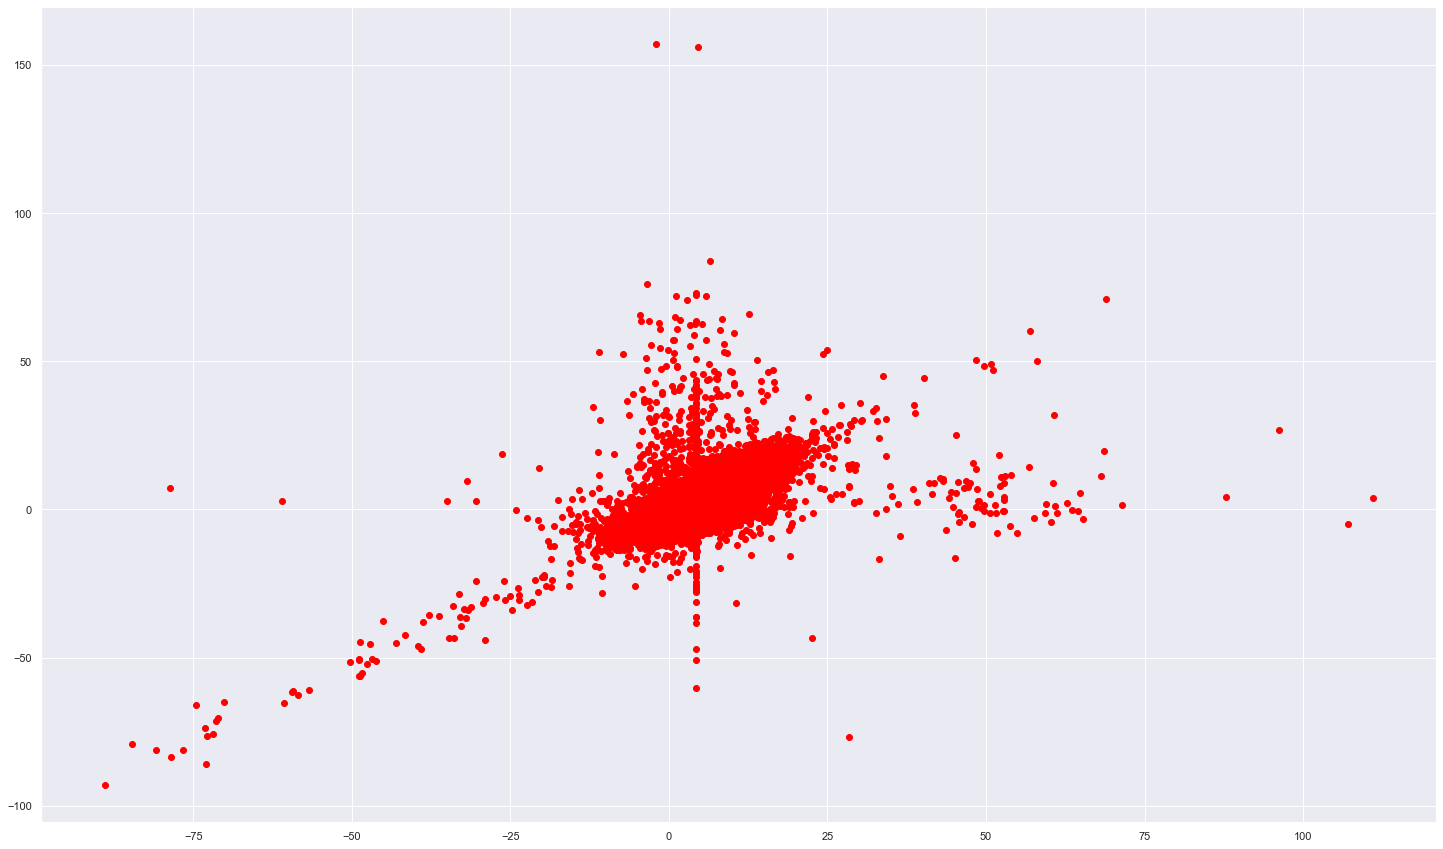

In [44]:
show_title("scatter for Xtrain and Ytrain")
plt.scatter(Xtrain,Ytrain,color='red')

::::::::::::::::::::::::|  line-plot of model  |::::::::::::::::::::::::


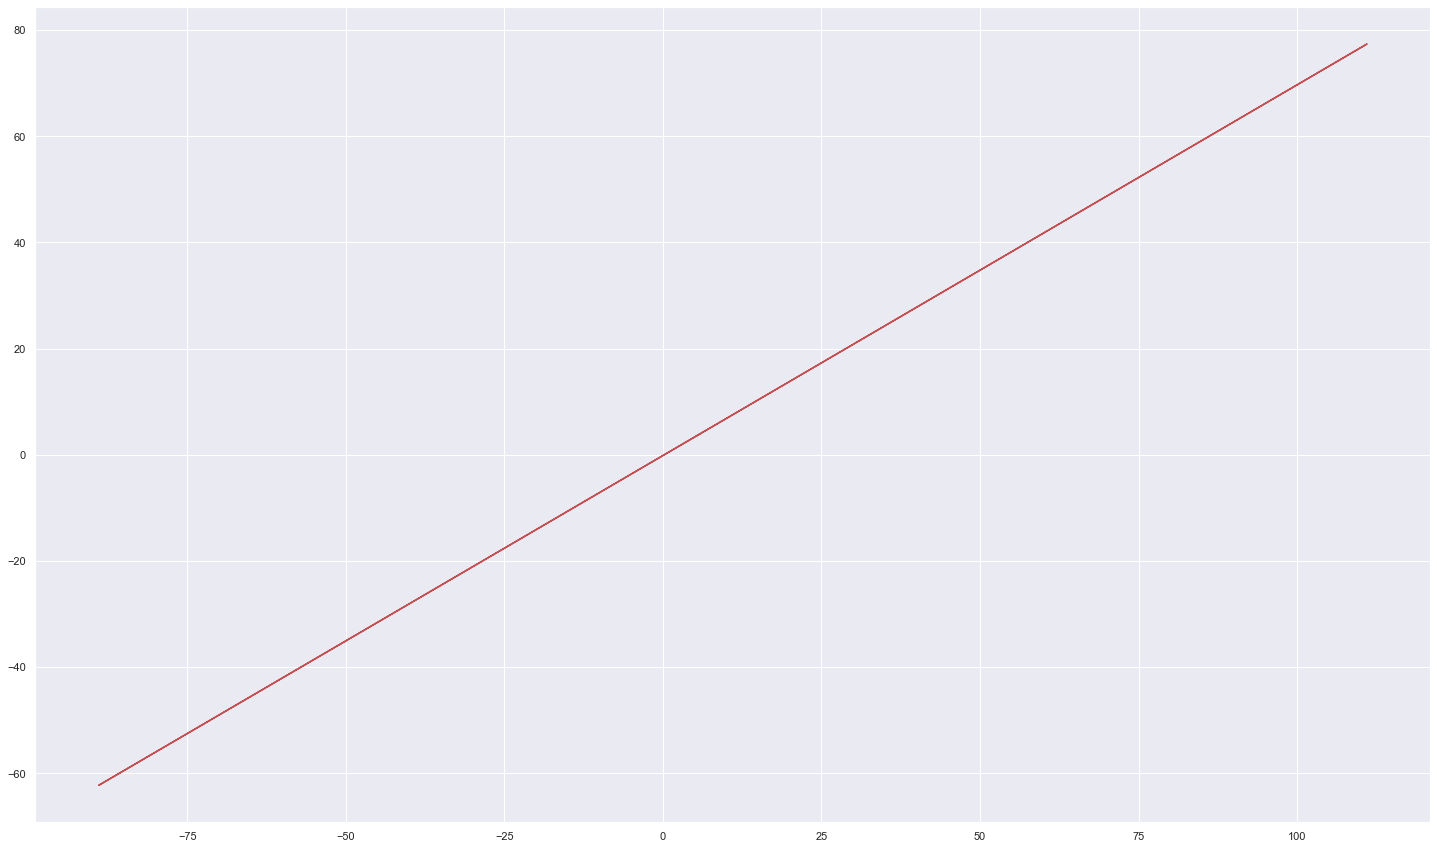

In [45]:
show_title("line-plot of model")
plt.plot(Xtrain,regr.coef_[0][0] * Xtrain + regr.intercept_[0],'-r')


In [46]:
Yhat=regr.predict(Xtest)

In [47]:
show_title("Mean Absolute Error")
mae=np.mean(np.absolute(Yhat-Ytest))
print("MAE :: %2f"% np.mean(np.absolute(Yhat-Ytest)))

::::::::::::::::::::::::|  Mean Absolute Error  |::::::::::::::::::::::::
MAE :: 4.259441


In [48]:
print("Residual Sum Of Sqaures :: %2f"% np.mean((Yhat-Ytest)**2))
rss=np.mean((Yhat-Ytest)**2)

Residual Sum Of Sqaures :: 49.527702


In [49]:
print("-> by using simple linear regression model\n-> we can say that showalter_index and lifted_index will predict independent variable. \n-> because mean absolute error : %2f is minimun and \n-> Residual sum of sqaure is : %2f which is also minimum"%(mae,rss))


-> by using simple linear regression model
-> we can say that showalter_index and lifted_index will predict independent variable. 
-> because mean absolute error : 4.259441 is minimun and 
-> Residual sum of sqaure is : 49.527702 which is also minimum


In [52]:
from time import sleep
sleep(10)
print("-> now, Let's use multiple linear regression model")
sleep(3)
show_title("Multiple Linear Regression")
sleep(3)
print("we have already cleared dataset so we direct start with Model")

-> now, Let's use multiple linear regression model
::::::::::::::::::::::::|  Multiple Linear Regression  |::::::::::::::::::::::::
we have already cleared dataset so we direct start with Model


In [53]:
show_title("Division of data set")
print("\t\t+--------------+---------------+")
print('\t\t| test set     |   ',test.shape," |")
print('\t\t| train set    | + ',train.shape,"|")
print("\t\t+--------------+---------------+")
print('\t\t| Original set |  ',df.shape," |")
print("\t\t+--------------+---------------+")


::::::::::::::::::::::::|  Division of data set  |::::::::::::::::::::::::
		+--------------+---------------+
		| test set     |    (4249, 4)  |
		| train set    | +  (17214, 4) |
		+--------------+---------------+
		| Original set |   (21463, 4)  |
		+--------------+---------------+


In [54]:
21463-17190

4273

In [55]:
show_title("X train set")
print("->independent variables as we check above \n\tshowalter_index : showlater\n\tllifted_index   : lifted")
Xtrain=train[['showalter','lifted']]

::::::::::::::::::::::::|  X train set  |::::::::::::::::::::::::
->independent variables as we check above 
	showalter_index : showlater
	llifted_index   : lifted


In [56]:
show_title("Y Train set")
print("->Dependent variable : Precipitable_water_mm_for_entire_sounding")
Ytrain=train[['precipitable']]


::::::::::::::::::::::::|  Y Train set  |::::::::::::::::::::::::
->Dependent variable : Precipitable_water_mm_for_entire_sounding


In [57]:
from sklearn import linear_model
multi_regr=linear_model.LinearRegression()
X=np.asanyarray(Xtrain)
Y=np.asanyarray(Ytrain)
    # now, let's fit the model
multi_regr.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [58]:
coef1=multi_regr.coef_
intr1=multi_regr.intercept_

In [59]:
Xtest=test[['showalter','lifted']]
Ytest=test[['precipitable']]

In [61]:
print("\tModel 1: \n\t:::Independent variables:::\n1) showalter_index\n2) lifted_index\n\t::: Dependent variable :::\nPrecipitable_water_mm_for_entire_sounding")
sleep(2)

Yhat=multi_regr.predict(Xtest)
MAE1=np.mean(np.absolute(Yhat-Ytest))
RMSE1=np.mean((Yhat-Ytest)**2)
print("")
show_title("Model Features")
print('Coefficients : ',coef1)
print('Intercept : ',intr1)
print("Mean Absolute Error             (MAE) : %.2f "% MAE1)
print('Residual Sum Of Sqaures Error. (RMSE) : %.2f'% RMSE1)

	Model 1: 
	:::Independent variables:::
1) showalter_index
2) lifted_index
	::: Dependent variable :::
Precipitable_water_mm_for_entire_sounding

::::::::::::::::::::::::|  Model Features  |::::::::::::::::::::::::
Coefficients :  [[-0.23670351 -1.02821687]]
Intercept :  [44.53294935]
Mean Absolute Error             (MAE) : 22.70 
Residual Sum Of Sqaures Error. (RMSE) : 31209.13


In [63]:
print("\tModel 2: \n\t:::Independent variables:::\n1) showalter_index\n2) lifted_index\n3) sweat_index\n\t::: Dependent variable :::\nPrecipitable_water_mm_for_entire_sounding")
Xtrain=train[['showalter','lifted','sweat']]
Ytrain=train[['precipitable']]
from sklearn import linear_model
multi_regr1=linear_model.LinearRegression()
X=np.asanyarray(Xtrain)
Y=np.asanyarray(Ytrain)
    # now, let's fit the model
multi_regr.fit(X,Y)
coef1=multi_regr.coef_
intr1=multi_regr.intercept_
sleep(2)
print("")
show_title("Model Features")
print('Coefficients : ',coef1)
print('Intercept : ',intr1)
Xtest=test[['showalter','lifted','sweat']]
Ytest=test[['precipitable']]
Yhat=multi_regr.predict(Xtest)
MAE2=np.mean(np.absolute(Yhat-Ytest))
RMSE2=np.mean((Yhat-Ytest)**2)
print("Mean Absolute Error             (MAE) : %.2f "% MAE2)
print('Residual Sum Of Sqaures Error. (RMSE) : %.2f'% RMSE2)

	Model 2: 
	:::Independent variables:::
1) showalter_index
2) lifted_index
3) sweat_index
	::: Dependent variable :::
Precipitable_water_mm_for_entire_sounding

::::::::::::::::::::::::|  Model Features  |::::::::::::::::::::::::
Coefficients :  [[-0.35733691 -1.05086581 -0.01229155]]
Intercept :  [47.15362281]
Mean Absolute Error             (MAE) : 22.79 
Residual Sum Of Sqaures Error. (RMSE) : 31211.41


In [64]:
show_title("Summary")
print("+------------+---------------------------------+-------------------------------- +")
print("|            |      MODEL :1                   |          MODEL : 2              |")
print("+------------+---------------------------------+---------------------------------+")
print("|Feature Sets| 1) Showalter_index as showalter | 1) Showalter_index as showalter |")
print("|(indirect   | 2) Lifted_index as lifted       | 2) Lifted_index as lifted       |")
print("| Variables) |                                 | 3) SWEAT_index as sweat         |")
print("+------------+---------------------------------+---------------------------------+")
print("| MAE        |       %f                 |       %f                 |"%(MAE1,MAE2))
print("+------------+---------------------------------+---------------------------------+")
print("| RMSE       |       %f              |       %f              |"%(RMSE1,RMSE2))
print("+------------+---------------------------------+---------------------------------+")

::::::::::::::::::::::::|  Summary  |::::::::::::::::::::::::
+------------+---------------------------------+-------------------------------- +
|            |      MODEL :1                   |          MODEL : 2              |
+------------+---------------------------------+---------------------------------+
|Feature Sets| 1) Showalter_index as showalter | 1) Showalter_index as showalter |
|(indirect   | 2) Lifted_index as lifted       | 2) Lifted_index as lifted       |
| Variables) |                                 | 3) SWEAT_index as sweat         |
+------------+---------------------------------+---------------------------------+
| MAE        |       22.698098                 |       22.789463                 |
+------------+---------------------------------+---------------------------------+
| RMSE       |       31209.128477              |       31211.410477              |
+------------+---------------------------------+---------------------------------+


In [65]:
show_title("Conclusion")
print("\n-> In dataset Showalter_index and Lifted_index shows the linear relation\n   so we have used those variables as independent or we can say indirect.")
print("\n-> Residual Mean Sqaure Error (RMSE) is same in both the models.")
print("   also, Mean Absolute Error (MAE) is same in both the models.")
print("\n-> Hence performance of Model-1 and model-2 is comparatively same.")

::::::::::::::::::::::::|  Conclusion  |::::::::::::::::::::::::

-> In dataset Showalter_index and Lifted_index shows the linear relation
   so we have used those variables as independent or we can say indirect.

-> Residual Mean Sqaure Error (RMSE) is same in both the models.
   also, Mean Absolute Error (MAE) is same in both the models.

-> Hence performance of Model-1 and model-2 is comparatively same.
